In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import io,color
from skimage.util import img_as_ubyte

In [61]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


#1.Loading and displaying the original image

In [62]:
image = io.imread(r"C:\Users\91863\Downloads\PCA\road-car-vehicle-170811.jpg")

In [63]:
image.shape

(2760, 4912, 3)

In [64]:
image

array([[[186, 109,  37],
        [186, 109,  37],
        [185, 109,  33],
        ...,
        [ 31,  51,  16],
        [ 36,  55,  23],
        [ 30,  49,  17]],

       [[186, 109,  37],
        [186, 109,  37],
        [185, 109,  34],
        ...,
        [ 28,  47,  15],
        [ 33,  52,  22],
        [ 27,  46,  16]],

       [[187, 108,  39],
        [187, 109,  37],
        [186, 108,  34],
        ...,
        [ 24,  43,  15],
        [ 29,  48,  20],
        [ 22,  41,  13]],

       ...,

       [[178, 160, 148],
        [182, 164, 152],
        [184, 168, 155],
        ...,
        [168, 159, 150],
        [171, 164, 154],
        [175, 168, 160]],

       [[176, 160, 147],
        [176, 160, 147],
        [172, 156, 143],
        ...,
        [172, 164, 153],
        [174, 167, 157],
        [178, 171, 161]],

       [[170, 154, 141],
        [169, 153, 140],
        [163, 146, 136],
        ...,
        [175, 167, 156],
        [177, 170, 160],
        [180, 173, 163]]

### Converting the color image into gray scale image

In [65]:
gray_image = color.rgb2gray(image)

In [66]:
gray_image

array([[0.47126   , 0.47126   , 0.46929569, ..., 0.17343725, 0.1908051 ,
        0.16727569],
       [0.47126   , 0.47126   , 0.46957843, ..., 0.15943255, 0.17960588,
        0.15607647],
       [0.46985333, 0.47209333, 0.46760627, ..., 0.14487725, 0.1644851 ,
        0.13703412],
       ...,
       [0.63905804, 0.65474431, 0.66848118, ..., 0.62848471, 0.64614314,
        0.6623949 ],
       [0.63710863, 0.63710863, 0.62142235, ..., 0.64669373, 0.65790784,
        0.67359412],
       [0.61357922, 0.60965765, 0.58388824, ..., 0.65845843, 0.66967255,
        0.68143725]])

In [67]:
gray_image.shape

(2760, 4912)

Text(0.5, 1.0, 'Original image')

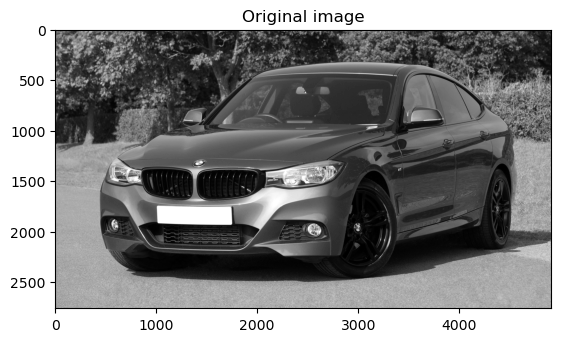

In [68]:
plt.imshow(gray_image,cmap="gray")
plt.title("Original image")

In [69]:
flatten_image = gray_image.reshape(gray_image.shape[0],-1)
flatten_image.shape

(2760, 4912)

###Creating a PCA Object

In [70]:
pca = PCA(n_components=0.9)

In [71]:
td = pca.fit_transform(gray_image)
td

array([[-3.89800494, -2.3269202 ,  1.47447257, ..., -0.43211238,
        -2.12830579,  0.72343966],
       [-3.91669782, -2.36024447,  1.56918557, ..., -0.51116558,
        -2.24441007,  0.6739335 ],
       [-3.84031537, -2.37990473,  1.59990069, ..., -0.59380669,
        -2.36742346,  0.64740185],
       ...,
       [20.68091907, -6.40871022, -5.64664767, ...,  0.04956982,
         0.25007937,  0.29871022],
       [20.72664592, -6.37473546, -5.7989477 , ...,  0.04617792,
         0.1471644 ,  0.28823889],
       [20.72641355, -6.40274888, -5.86730636, ...,  0.08307401,
         0.1203232 ,  0.27998639]])

In [72]:
reconstructed_image = pca.inverse_transform(td)
reconstructed_image

array([[0.42434959, 0.43001893, 0.43736307, ..., 0.24904913, 0.24664382,
        0.24240806],
       [0.42656582, 0.4323307 , 0.4396147 , ..., 0.2428811 , 0.24058406,
        0.23655177],
       [0.4317155 , 0.43762612, 0.44493641, ..., 0.2393425 , 0.2374429 ,
        0.23383772],
       ...,
       [0.62411438, 0.62307181, 0.62169371, ..., 0.66096387, 0.65621797,
        0.65202861],
       [0.62968934, 0.62862782, 0.62714678, ..., 0.66204476, 0.65726881,
        0.65294225],
       [0.63261865, 0.6318445 , 0.63059956, ..., 0.66092515, 0.65592688,
        0.65142955]])

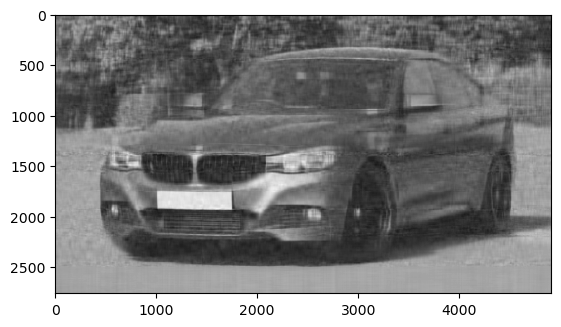

In [73]:
plt.imshow(reconstructed_image,cmap="gray")

In [74]:
# Normalizing the data for saving

In [75]:
compressed_image_normalize =((reconstructed_image-reconstructed_image.min())/(reconstructed_image.max()-reconstructed_image.min()))

In [76]:
compressed_image_normalize

array([[0.46452449, 0.46864136, 0.47397443, ..., 0.33722736, 0.33548071,
        0.33240484],
       [0.46613384, 0.47032009, 0.47560948, ..., 0.33274834, 0.33108031,
        0.32815221],
       [0.46987335, 0.47416545, 0.47947392, ..., 0.33017874, 0.32879931,
        0.32618136],
       ...,
       [0.60958677, 0.60882969, 0.60782896, ..., 0.63634559, 0.63289929,
        0.62985712],
       [0.61363511, 0.61286427, 0.61178879, ..., 0.6371305 , 0.63366237,
        0.63052057],
       [0.61576228, 0.61520011, 0.61429608, ..., 0.63631748, 0.6326879 ,
        0.6294221 ]])

In [77]:
convert_image_byte = img_as_ubyte(compressed_image_normalize)

In [78]:
convert_image_byte

array([[118, 120, 121, ...,  86,  86,  85],
       [119, 120, 121, ...,  85,  84,  84],
       [120, 121, 122, ...,  84,  84,  83],
       ...,
       [155, 155, 155, ..., 162, 161, 161],
       [156, 156, 156, ..., 162, 162, 161],
       [157, 157, 157, ..., 162, 161, 161]], dtype=uint8)

In [79]:
io.imsave("new_image.jpg",convert_image_byte)